In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

2023-08-18 02:48:44.531352: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('Data/features_3_sec.csv')

In [3]:
# datatypes
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [4]:
#shape
df.shape

(9990, 60)

In [5]:
# Loading a sample audio from the dataset
audio ="Data/genres_original/pop/pop.00010.wav"
data,sr=librosa.load(audio)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [6]:
# initiating sample rate to 45000
librosa.load(audio,sr=45000)

(array([-0.05909861, -0.0777676 , -0.0762911 , ..., -0.01566424,
        -0.01022264,  0.        ], dtype=float32),
 45000)

In [7]:
# Taking Short-time Fourier transform of the signal
y = librosa.stft(data)  
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [8]:
import IPython

In [9]:
IPython.display.Audio(data,rate=sr)

In [10]:
plt.savefig('Images/waveshow.png')

<Figure size 640x480 with 0 Axes>

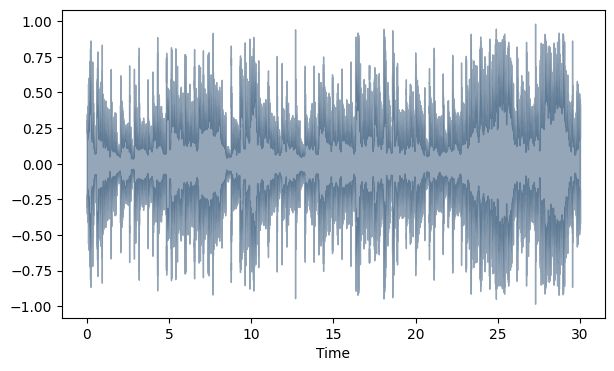

<Figure size 640x480 with 0 Axes>

In [11]:
# Wave form of the audio
plt.figure(figsize=(7,4))
librosa.display.waveshow(data,color="#2B4F72", alpha = 0.5)
plt.show()
plt.savefig('Images/waveshow.png')

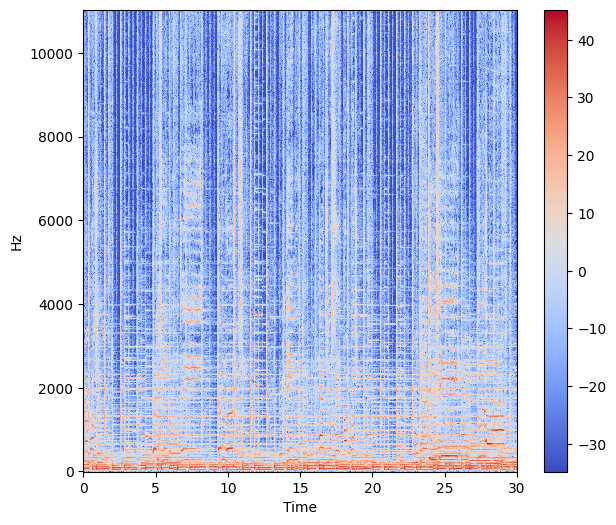

In [12]:
# Spectrogram of the audio
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()
plt.savefig('Images/spectrogram.png')

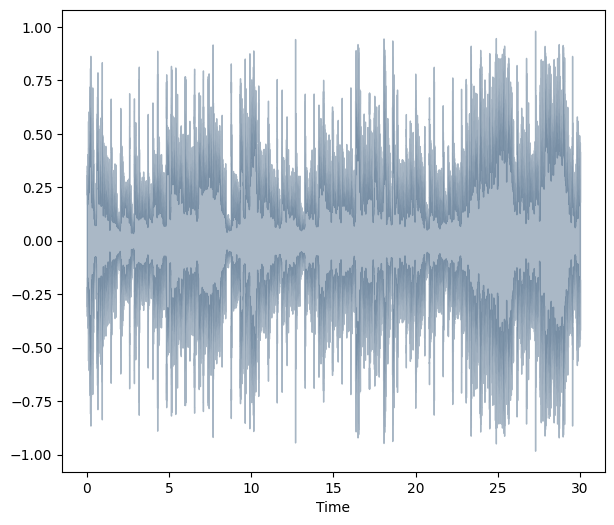

In [13]:
# Data Preprocessing
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")
plt.savefig('Images/spectral_rolloff.png')

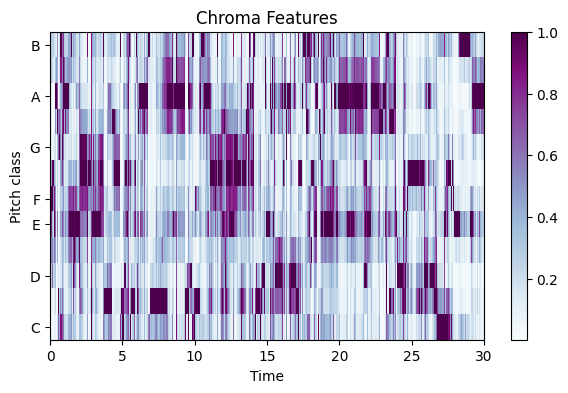

<Figure size 640x480 with 0 Axes>

In [14]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data,sr=sr)
plt.figure(figsize=(7,4))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="BuPu")
plt.colorbar()
plt.title("Chroma Features")
plt.show()
plt.savefig('Images/chroma.png')

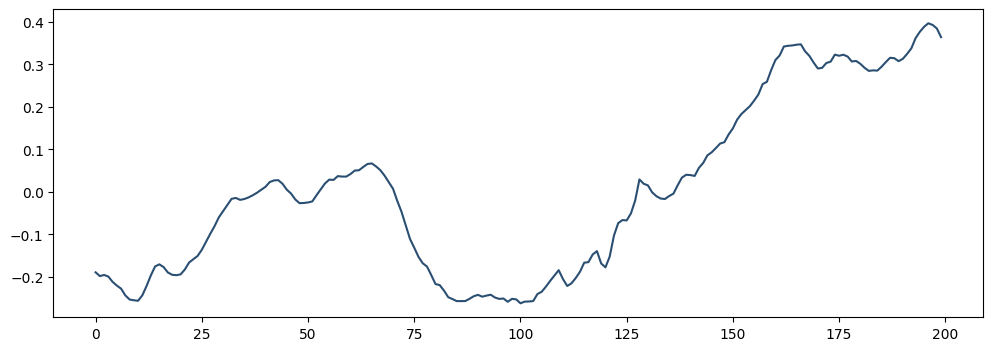

In [15]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")

In [16]:
# Printing the number of times signal crosses the x-axis
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero_crossings are :", sum(zero_cross_rate))

The number of zero_crossings are : 7


In [17]:
# Finding misssing values
# Find all columns with any NA values
print("Columns containing missing values",list(df.columns[df.isnull().any()]))

Columns containing missing values []


In [18]:
# Label Encoding - encod the categorical classes with numerical integer values for training

class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
#features
print(df.iloc[:,:-1])

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [20]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [21]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [22]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Training set score: 0.951
Test set score: 0.887
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       290
           1       0.88      0.93      0.90       300
           2       0.78      0.82      0.80       288
           3       0.82      0.92      0.86       317
           4       0.91      0.89      0.90       303
           5       0.87      0.87      0.87       289
           6       0.98      0.95      0.96       316
           7       0.94      0.87      0.90       290
           8       0.89      0.92      0.91       300
           9       0.91      0.79      0.85       304

    accuracy                           0.89      2997
   macro avg       0.89      0.89      0.89      2997
weighted avg       0.89      0.89      0.89      2997



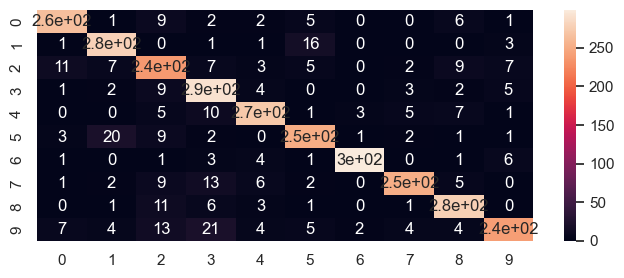

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))

In [23]:
# Training the model using the following parameters
# metrics = accuracy
# epochs = 600
# loss = sparse_categorical_crossentropy
# batch_size = 256
# optimizer = adam

def train_model(model,epochs,optimizer):
    batch_size=256
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [24]:
def Validation_plot(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [25]:
# We used different layers to train the neural network by importing keras library from tensorflow framework 
# for input and hidden neurons we use the most widly used activation function which is relu where as for output neurons we uses softmax activation function
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10,activation='softmax'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)
model.compile(optimizer=optimizer,
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dropout (Dropout)           (None, 58)                0         
                                                                 
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [26]:
model_history=train_model(model=model,epochs=600,optimizer='adam')

Epoch 1/600
28/28 [==============================] - 1s 13ms/step - loss: 2.0111 - accuracy: 0.2614 - val_loss: 1.5613 - val_accuracy: 0.4478
Epoch 2/600
28/28 [==============================] - 0s 7ms/step - loss: 1.6302 - accuracy: 0.4057 - val_loss: 1.3083 - val_accuracy: 0.5265
Epoch 3/600
28/28 [==============================] - 0s 7ms/step - loss: 1.4552 - accuracy: 0.4750 - val_loss: 1.1632 - val_accuracy: 0.5799
Epoch 4/600
28/28 [==============================] - 0s 7ms/step - loss: 1.3418 - accuracy: 0.5204 - val_loss: 1.0520 - val_accuracy: 0.6496
Epoch 5/600
28/28 [==============================] - 0s 7ms/step - loss: 1.2454 - accuracy: 0.5667 - val_loss: 0.9504 - val_accuracy: 0.6733
Epoch 6/600
28/28 [==============================] - 0s 7ms/step - loss: 1.1884 - accuracy: 0.5907 - val_loss: 0.9088 - val_accuracy: 0.6957
Epoch 7/600
28/28 [==============================] - 0s 7ms/step - loss: 1.1088 - accuracy: 0.6179 - val_loss: 0.8450 - val_accuracy: 0.7074
Epoch 8/600


In [27]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

12/12 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.9349
The test loss is  0.2517734169960022
The best accuracy is:  93.4934914112091


Validation Accuracy 0.9406072497367859


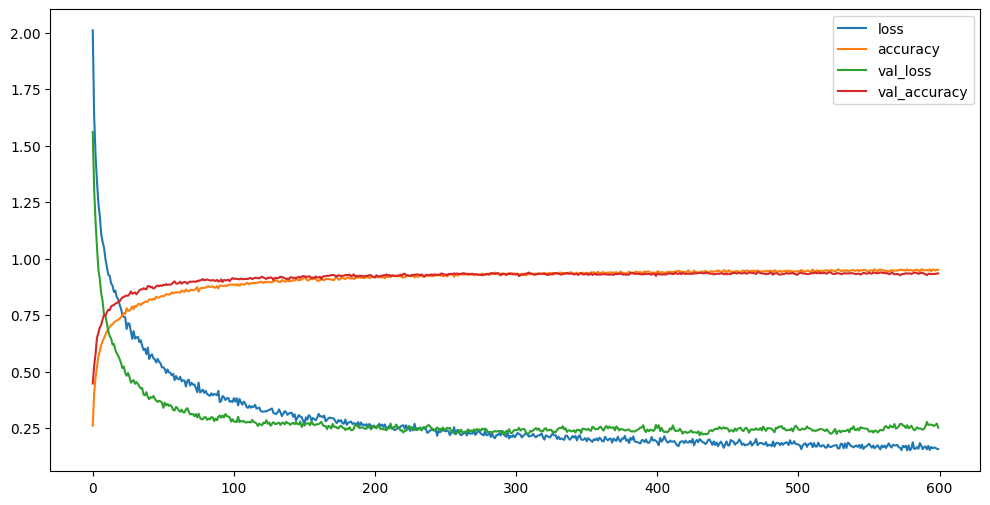

In [28]:
# The plot dipicts how training and testing data performed
Validation_plot(model_history)

In [29]:
# Sample testing
sample = X_test
sample = sample[np.newaxis, ...]
prediction = model.predict(X_test)
predicted_index = np.argmax(prediction, axis = 1)
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

94/94 [==============================] - 0s 871us/step
Expected Index: [8 4 4 ... 7 0 4], Predicted Index: [8 4 4 ... 7 2 4]


In [30]:
 #Plotting the confusion matrix for analizing the true positives and negatives
import seaborn as sn
import matplotlib.pyplot as plt
pred_x = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_index )
cm

94/94 [==============================] - 0s 843us/step


array([[268,   0,  12,   5,   2,   1,   0,   0,   2,   0],
       [  0, 292,   1,   0,   1,   6,   0,   0,   0,   0],
       [  1,   1, 265,   0,   1,   7,   0,   2,   6,   5],
       [  2,   1,   4, 288,   5,   0,   2,   8,   2,   5],
       [  1,   0,   1,   3, 290,   0,   1,   5,   2,   0],
       [  1,  11,   4,   1,   0, 267,   2,   3,   0,   0],
       [  2,   0,   0,   2,   3,   0, 297,   0,   1,  11],
       [  0,   0,   3,   4,   2,   3,   0, 273,   3,   2],
       [  0,   1,   4,   1,   1,   1,   0,   2, 290,   0],
       [  2,   0,   3,  12,   7,   2,   3,   1,   2, 272]])